In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

import math
# from pycaret.datasets import get_data
# from google.colab import drive
# drive.mount("/drive", force_remount=True)

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/edit?usp=sharing'
url = url[:url.rfind('/')] + '/export?format=csv'

df = pd.read_csv(url)
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [3]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])
df['Smoking status'] = df['Smoking status'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [4]:
df['Bedtime'] = df['Bedtime'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))

<Axes: xlabel='Bedtime', ylabel='Sleep efficiency'>

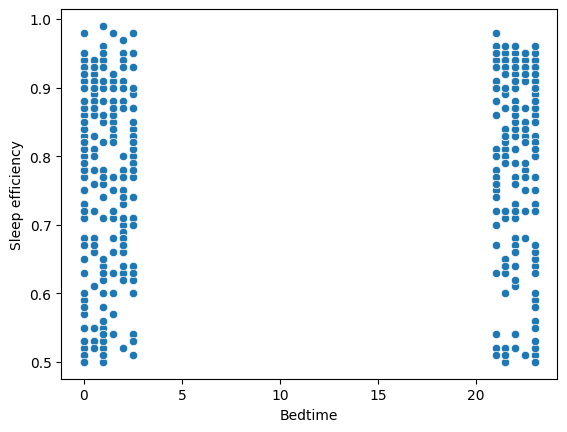

In [5]:
sns.scatterplot(x=df['Bedtime'], y=df['Sleep efficiency'])

<Axes: xlabel='Bedtime', ylabel='Sleep efficiency'>

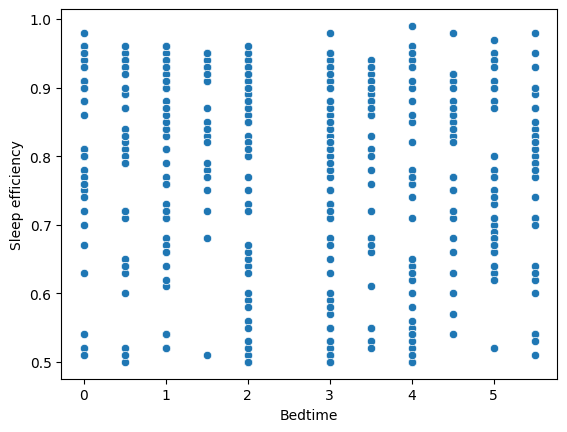

In [6]:
df['Bedtime'] = df['Bedtime'].apply(lambda x: (x - 21) % 24)
sns.scatterplot(x=df['Bedtime'], y=df['Sleep efficiency'])

In [7]:
df.isna().mean()

ID                        0.000000
Age                       0.000000
Gender                    0.000000
Bedtime                   0.000000
Wakeup time               0.000000
Sleep duration            0.000000
Sleep efficiency          0.000000
REM sleep percentage      0.000000
Deep sleep percentage     0.000000
Light sleep percentage    0.000000
Awakenings                0.044248
Caffeine consumption      0.055310
Alcohol consumption       0.030973
Smoking status            0.000000
Exercise frequency        0.013274
dtype: float64

In [8]:
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,0,4.0,7.0,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0
1,2,69,1,5.0,9.0,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0
2,3,40,0,0.5,5.5,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,4,40,0,5.5,8.5,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0
4,5,57,1,4.0,9.0,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,0,1.0,5.5,7.5,0.91,22,57,21,0.0,0.0,0.0,0,5.0
448,449,52,1,0.0,3.0,6.0,0.74,28,57,15,4.0,25.0,0.0,0,3.0
449,450,40,0,2.0,7.5,8.5,0.55,20,32,48,1.0,NaN,3.0,1,0.0
450,451,45,1,0.0,4.0,7.0,0.76,18,72,10,3.0,0.0,0.0,0,3.0


In [9]:
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean())

In [10]:
#df = df.fillna(0)

In [11]:
df = df.drop(columns=['ID'])

In [12]:
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].mean())

In [13]:
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean())

In [14]:
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].mean())

In [15]:
df.describe()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,2.636062,7.101770,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,0.340708,1.791480
std,13.172250,0.500534,1.687559,1.955899,0.866625,0.135237,3.525963,15.654235,15.313665,1.326338,29.353745,1.596013,0.474472,1.418603
min,9.000000,0.000000,0.000000,3.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,5.500000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,3.000000,7.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,23.653396,0.000000,0.000000,2.000000
75%,52.000000,1.000000,4.000000,9.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,5.500000,12.500000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000


In [16]:
df.corr()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Age,1.000000,0.244468,0.136799,0.090355,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017468,-0.168273,0.046474,0.031237,0.071892
Gender,0.244468,1.000000,0.031442,0.007466,-0.044376,0.010062,-0.161102,0.075939,-0.040534,0.074205,-0.242839,0.058287,0.143020,0.230169
Bedtime,0.136799,0.031442,1.000000,0.897138,0.077487,-0.140665,-0.079307,-0.091077,0.111363,0.099268,-0.004032,0.013589,0.216126,-0.313931
Wakeup time,0.090355,0.007466,0.897138,1.000000,0.509939,-0.133537,-0.075489,-0.095111,0.114607,0.087789,-0.009922,-0.008507,0.188340,-0.300948
Sleep duration,-0.062462,-0.044376,0.077487,0.509939,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004829,-0.014542,-0.045662,0.004211,-0.067903
Sleep efficiency,0.098357,0.010062,-0.140665,-0.133537,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.554498,0.063121,-0.383671,-0.290026,0.257974
REM sleep percentage,0.042091,-0.161102,-0.079307,-0.075489,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.024992,0.058018,-0.051709,0.032184,0.031165
Deep sleep percentage,0.021730,0.075939,-0.091077,-0.095111,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.300301,0.001683,-0.355842,-0.226802,0.178281
Light sleep percentage,-0.031905,-0.040534,0.111363,0.114607,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.312734,-0.015079,0.375662,0.224436,-0.189422
Awakenings,-0.017468,0.074205,0.099268,0.087789,0.004829,-0.554498,-0.024992,-0.300301,0.312734,1.000000,-0.103769,0.198491,-0.020781,-0.212485


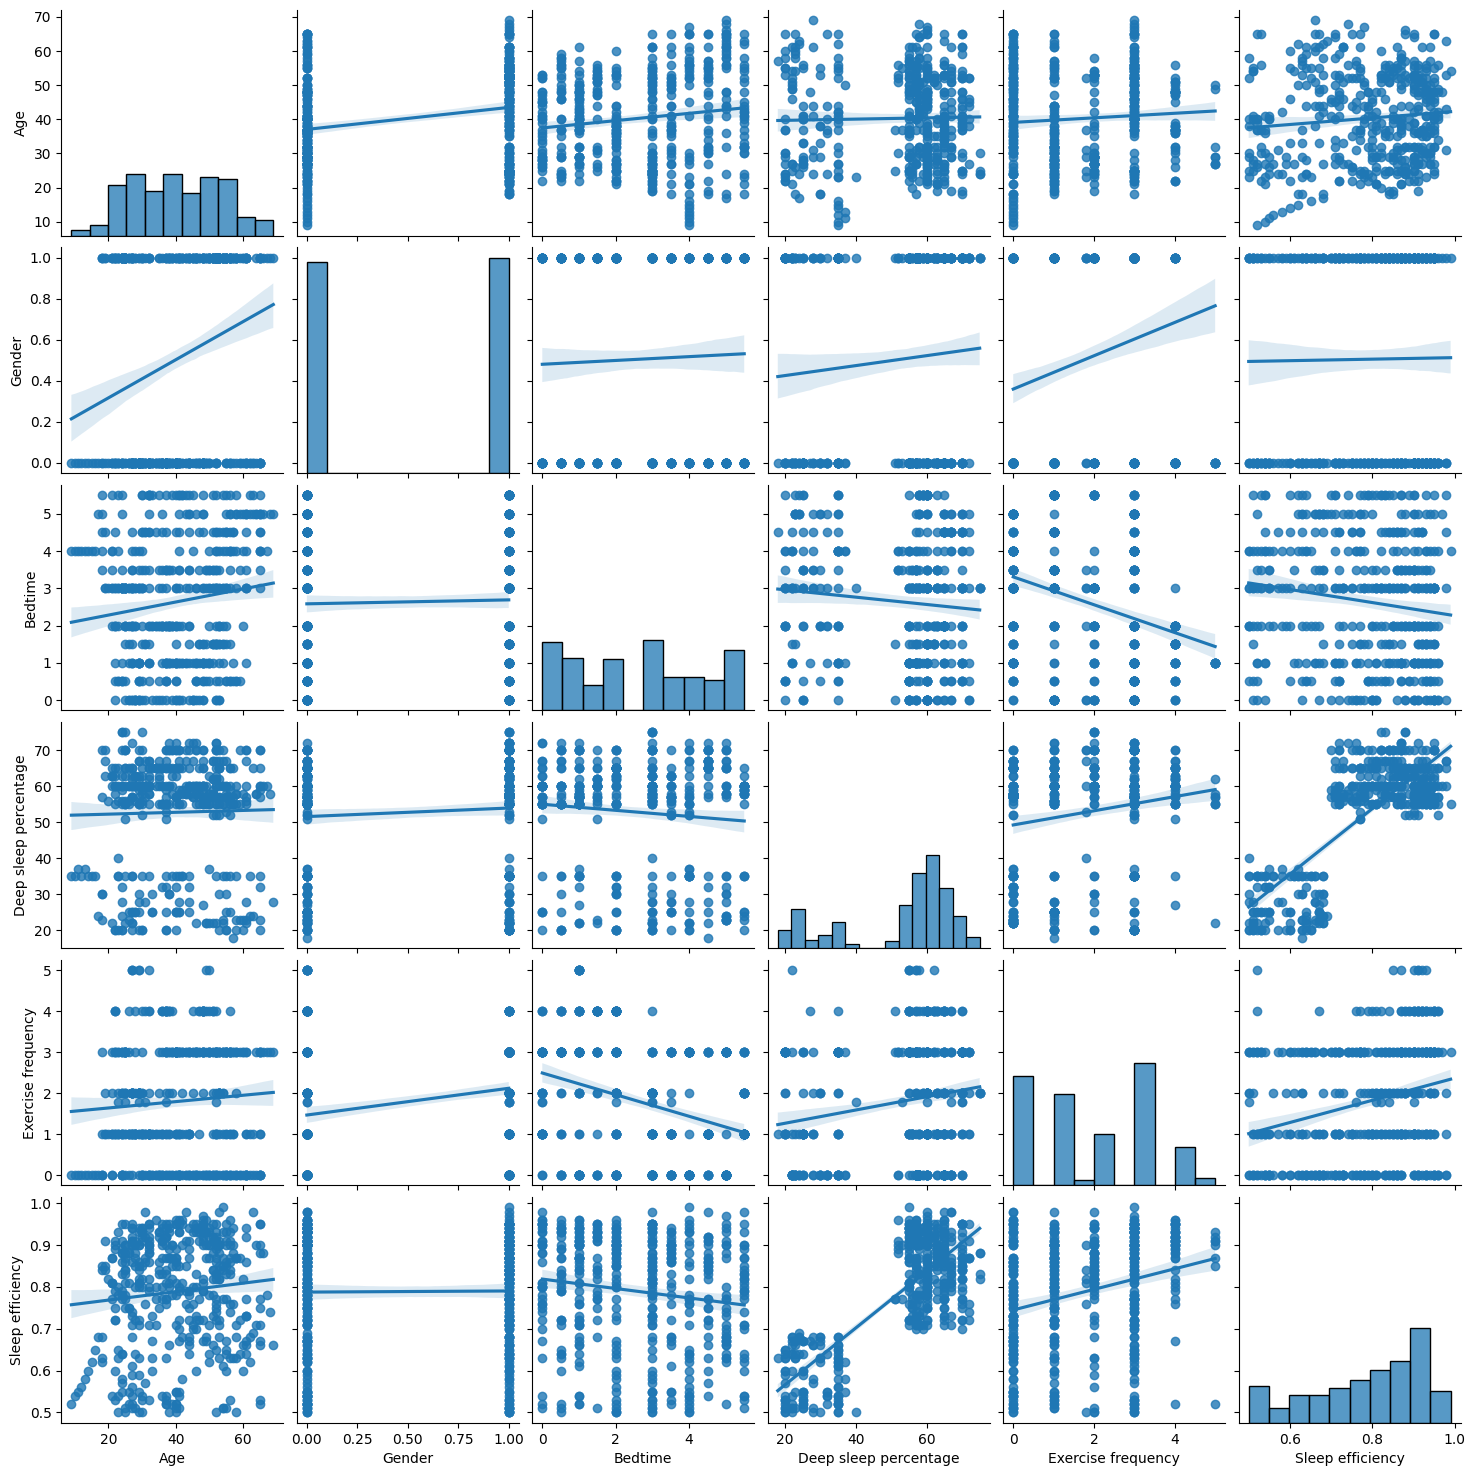

In [17]:
sns.pairplot(df[['Age', 'Gender', 'Bedtime',  'Deep sleep percentage', 'Exercise frequency', 'Sleep efficiency']], kind='reg')

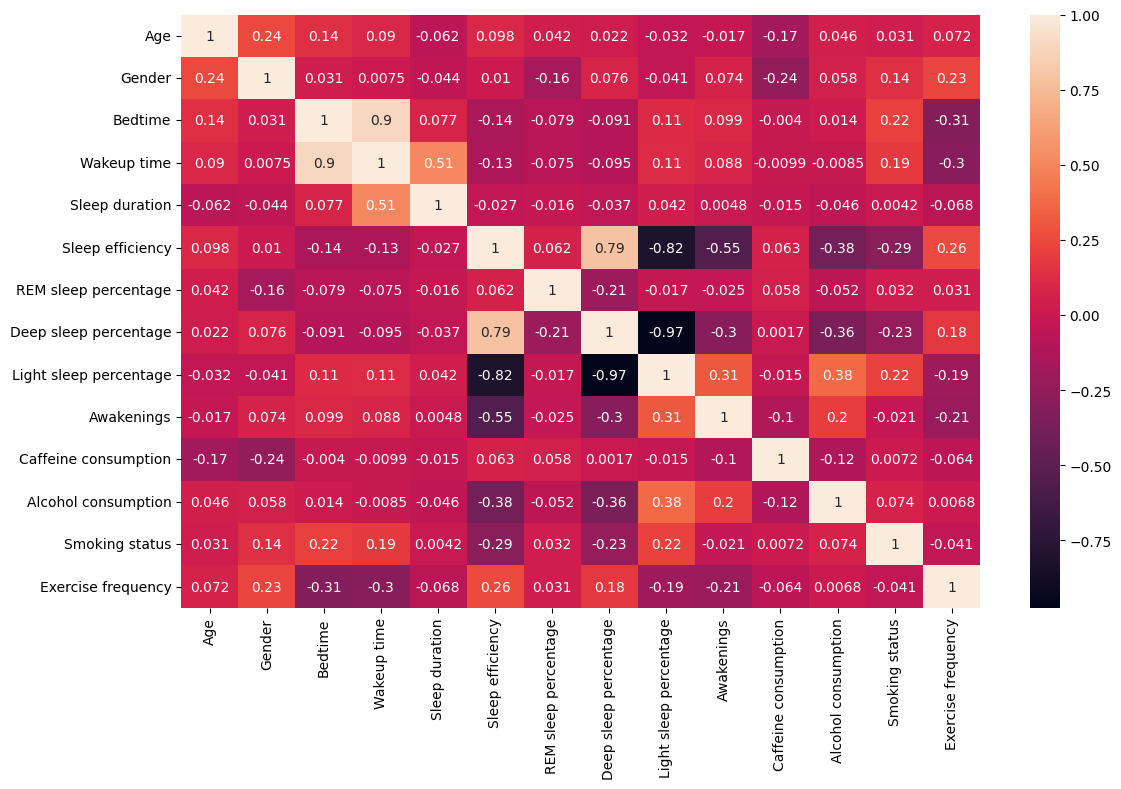

In [18]:
fig, ax = plt.subplots(figsize=(12,  8))
sns.heatmap(df.corr(), annot=True, ax=ax)
fig.tight_layout()

Modeling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [20]:
features = ['Age', 'Gender', 'Smoking status', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Awakenings', 'Bedtime', 'Wakeup time', 'Deep sleep percentage']
X = df[features]
y = df['Sleep efficiency']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [23]:
# Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [24]:
# Evaluate models
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [25]:
print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

Linear Regression MSE: 0.004941145631135968, R2: 0.7346047770574385
Random Forest MSE: 0.002824976933455452, R2: 0.8482668921276786


Analysis of Results

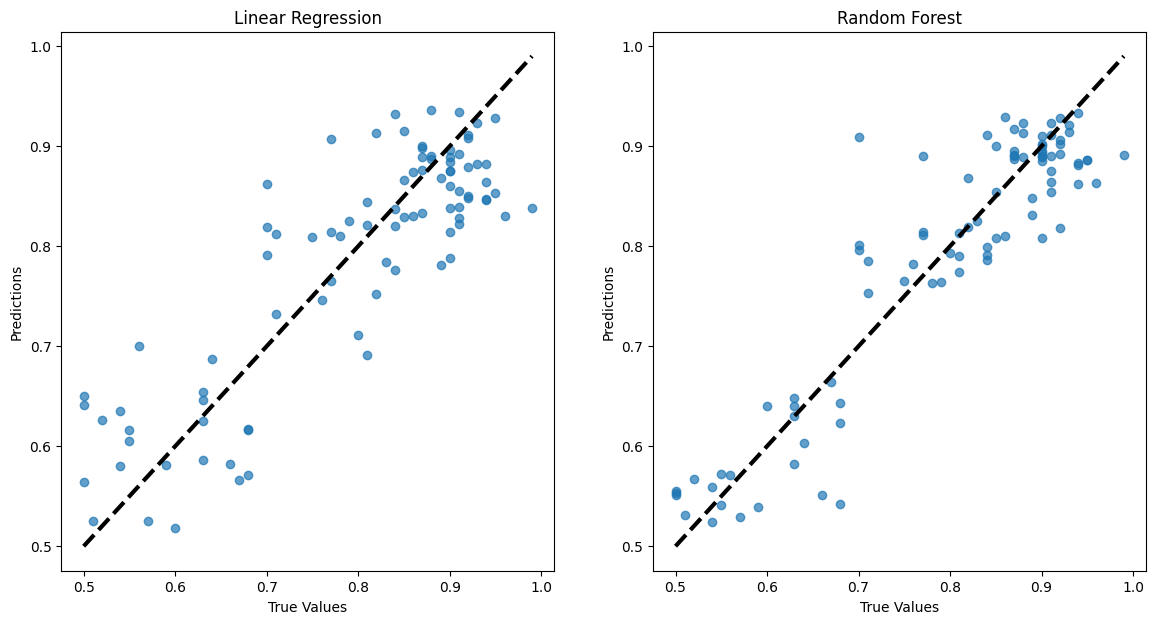

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].scatter(y_test, y_pred_lin, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('Linear Regression')

axes[1].scatter(y_test, y_pred_rf, alpha=0.7)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('Random Forest')

plt.show()

In [27]:
df_errors = pd.DataFrame({
    'True': y_test,
    'Linear Pred': y_pred_lin,
    'RF Pred': y_pred_rf
})
df_errors['Lin Error'] = df_errors['True'] - df_errors['Linear Pred']
df_errors['RF Error'] = df_errors['True'] - df_errors['RF Pred']


In [28]:
print("Error summary:")
print(df_errors.describe())

Error summary:
            True  Linear Pred    RF Pred  Lin Error   RF Error
count  91.000000    91.000000  91.000000  91.000000  91.000000
mean    0.793407     0.786356   0.789229   0.007050   0.004177
std     0.137204     0.118180   0.131580   0.070326   0.053280
min     0.500000     0.518241   0.524000  -0.161760  -0.209500
25%     0.690000     0.695717   0.708750  -0.032359  -0.021700
50%     0.840000     0.829200   0.824800   0.010919   0.006100
75%     0.900000     0.875612   0.891325   0.063189   0.040450
max     0.990000     0.935951   0.933500   0.152213   0.137800


In [29]:
print(f"Linear Regression MSE: {mse_lin}, R2: {r2_lin}")
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

Linear Regression MSE: 0.004941145631135968, R2: 0.7346047770574385
Random Forest MSE: 0.002824976933455452, R2: 0.8482668921276786


**Висновки**

**Помилки моделей**

**Linear Regression:**

Середнє значення помилки (mean error): 0.007050. Це означає, що в середньому модель занижує прогноз на 0.007050.

Стандартне відхилення (std): 0.070326. Це показує, що помилки мають значну розбіжність.

Мінімальна помилка (min error): -0.161760. Це означає, що найбільша негативна помилка складає приблизно -0.161760, тобто модель може занижувати прогноз на 16.18%.

Максимальна помилка (max error): 0.152213. Це означає, що найбільша позитивна помилка складає приблизно 15.22%.

**Random Forest:**

Середнє значення помилки (mean error): 0.004177. Це означає, що в середньому модель занижує прогноз на 0.004177.

Стандартне відхилення (std): 0.053280. Це показує, що помилки менше розбіжні, ніж у лінійної регресії.

Мінімальна помилка (min error): -0.209500. Це означає, що найбільша негативна помилка складає приблизно -20.95%, що трохи більше, ніж у лінійної регресії.

Максимальна помилка (max error): 0.137800. Це означає, що найбільша позитивна помилка складає приблизно 13.78%.

**На яких прикладах кожна модель більше помиляється**

Linear Regression більше помиляється на прикладах, де справжні значення ефективності сну високі (близько 0.99), так як максимальна позитивна помилка складає 0.152213.
Random Forest більше помиляється на прикладах, де справжні значення ефективності сну низькі (близько 0.50), так як мінімальна негативна помилка складає -0.209500.
Порівняння якості моделей
MSE (Mean Squared Error):

Linear Regression: MSE = 0.004946
Random Forest: MSE = 0.002835
Random Forest має менше значення MSE, що свідчить про кращу якість прогнозування.
R² (R-squared):

Linear Regression: R² = 0.3205
Random Forest: R² = 0.6215
Random Forest має вищий коефіцієнт детермінації, що означає, що ця модель краще пояснює варіацію цільової змінної.

**Загальні висновки**

Random Forest показує кращі результати у порівнянні з лінійною регресією, з меншим значенням MSE та вищим значенням R².

Linear Regression має більшу розбіжність у помилках і більше схильна до помилок при високих значеннях ефективності сну.

Random Forest також має свої помилки, але вони менше розбіжні та краще розподілені.

На основі цих висновків можна *рекомендувати використання моделі Random Forest* для прогнозування ефективності сну, так як вона показала кращу якість результатів та менші помилки.